# Polysaccharide simulations

In [3]:
import pandas as pd
import numpy as np
import copy
from collections import OrderedDict
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.gridspec import GridSpec

import cobra
import reframed
import molmass
#from sklearn.metrics import mean_squared_error

import sys
sys.path.append("../functions/")

%load_ext autoreload
%autoreload 2


import dfba_cobra_multiple_polysaccharides


### Cellulose

In [2]:

glc_poly_eq_dict =OrderedDict({"EX_cellulose_e":{

"EX_cellb_e":2,
"EX_cell3_e":3,
"EX_cell4_e":4,
"EX_cell5_e":5,
}})

C_dict =OrderedDict({
"Growth":0.1,
"EX_cellb_e": 0,
"EX_cell3_e": 0,
"EX_cell4_e": 0,
"EX_cell5_e": 0,
})


C_dict["EX_cellulose_e"]= 50


rxns = list(C_dict.keys())
y0 = np.array(list(C_dict.values()))

objective_dir = ["max", "max","max","max","max"]
best_r2 = {}

media = pd.read_csv('../input/media_db.tsv',sep='\t')
media = media.groupby('medium').agg({'compound': set})['compound'].to_dict()


In [3]:
model = dfba_cobra_multiple_polysaccharides.read_model(media)

Set parameter Username
Academic license - for non-commercial use only - expires 2025-03-14


In [4]:
%%time
sol = dfba_cobra_multiple_polysaccharides.optimize_parameters_inner_problem_general([10,5,3,5],
                                                                                    model,
                                                                                    media,
                                                                                    rxns,
                                                                                    y0,
                                                                                    objective_dir,
                                                                                    glc_poly_eq_dict,
                                                                                    t_end=150)


CPU times: user 33.4 s, sys: 192 ms, total: 33.6 s
Wall time: 33.9 s


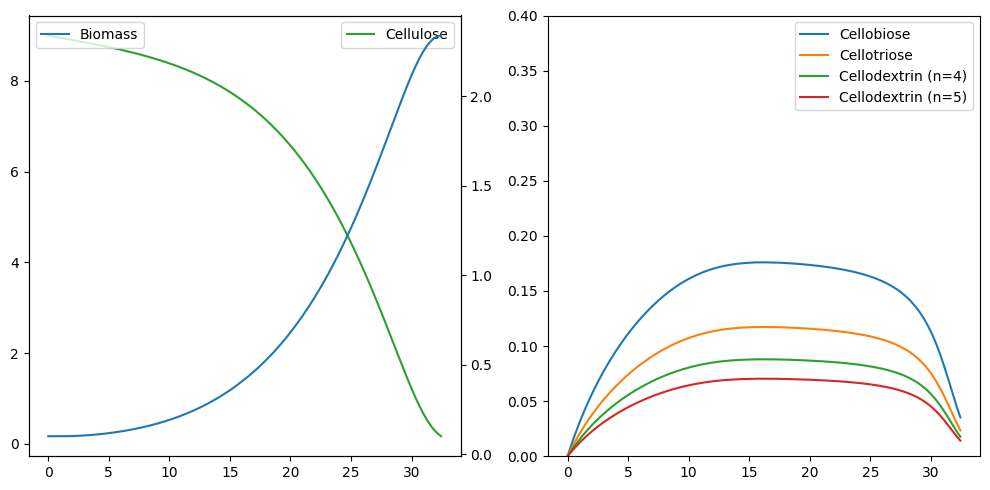

In [5]:
C_results = dict(zip(rxns,sol.y))

fig, ax = plt.subplots(1,2,figsize=(10,5))

ax[0].plot(sol.t,C_results["EX_cellulose_e"]*180/1000,label="Cellulose",color="tab:green")

ax_bio = plt.twinx(ax[0])
ax_bio.plot(sol.t,C_results["Growth"],label="Biomass")
ax[0].legend()
ax_bio.legend()

ax[1].plot(sol.t,C_results["EX_cellb_e"],label="Cellobiose")
ax[1].plot(sol.t,C_results["EX_cell3_e"],label="Cellotriose")
ax[1].plot(sol.t,C_results["EX_cell4_e"],label="Cellodextrin (n=4)")
ax[1].plot(sol.t,C_results["EX_cell5_e"],label="Cellodextrin (n=5)")
ax[1].legend()
ax[1].set_ylim([0,0.4])
plt.tight_layout()

### Xyloglucan

In [6]:

glc_poly_eq_dict =OrderedDict({"EX_xyloglucan_e":{
"EX_QLQG_e": 45/6,
"EX_QQLG_e":45/6,
"EX_QLLG_e":51/6,
"EX_QQQG_e":39/6,
"EX_GQQG_e":34/6
}})


C_dict =OrderedDict({
"Growth":0.1,
"EX_QLQG_e": 0,
"EX_QQLG_e": 0,
"EX_QLLG_e": 0,
"EX_QQQG_e": 0,
"EX_GQQG_e": 0,

})

C_dict["EX_xyloglucan_e"]= 50


rxns = list(C_dict.keys())
y0 = np.array(list(C_dict.values()))

objective_dir = ["max", "max","max","max","max","max"]
best_r2 = {}

media = pd.read_csv('../input/media_db.tsv',sep='\t')
media = media.groupby('medium').agg({'compound': set})['compound'].to_dict()


In [7]:
model = dfba_cobra_multiple_polysaccharides.read_model(media)

In [8]:
%%time
sol = dfba_cobra_multiple_polysaccharides.optimize_parameters_inner_problem_general([10,5,3,5],
                                                                                    model,
                                                                                    media,
                                                                                    rxns,
                                                                                    y0,
                                                                                    objective_dir,
                                                                                    glc_poly_eq_dict,
                                                                                    t_end=150)


CPU times: user 33.2 s, sys: 223 ms, total: 33.4 s
Wall time: 34.3 s


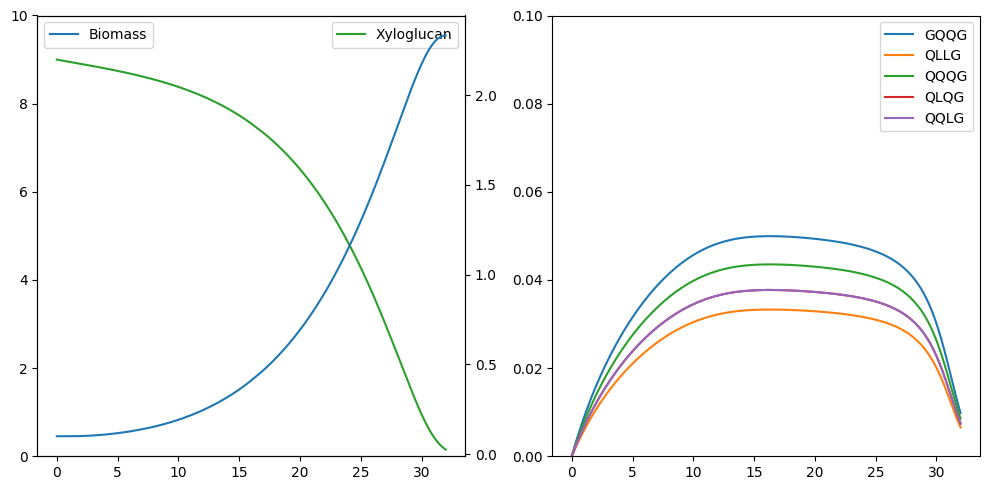

In [9]:
C_results = dict(zip(rxns,sol.y))

fig, ax = plt.subplots(1,2,figsize=(10,5))

ax[0].plot(sol.t,C_results["EX_xyloglucan_e"]*180/1000,label="Xyloglucan",color="tab:green")

ax_bio = plt.twinx(ax[0])
ax_bio.plot(sol.t,C_results["Growth"],label="Biomass")
ax[0].legend()
ax[0].set_ylim([0,10])
ax_bio.legend()

ax[1].plot(sol.t,C_results["EX_GQQG_e"],label="GQQG")
ax[1].plot(sol.t,C_results["EX_QLLG_e"],label="QLLG")
ax[1].plot(sol.t,C_results["EX_QQQG_e"],label="QQQG")
ax[1].plot(sol.t,C_results["EX_QLQG_e"],label="QLQG")
ax[1].plot(sol.t,C_results["EX_QQLG_e"],label="QQLG")

ax[1].legend()
ax[1].set_ylim([0,0.1])


plt.tight_layout()

### Arabinoxylan

In [10]:

glc_poly_eq_dict =OrderedDict({"EX_arabinoxylan_e":{
"EX_AX_e": 15/6,
"EX_AXX_e": 20/6,
"EX_XA23XX_e": 30/6,
"EX_A23XX_e": 25/6,
"EX_XAXX_e": 25/6,
}})


C_dict =OrderedDict({
"Growth":0.1,
"EX_AX_e": 0,
"EX_AXX_e": 0,
"EX_XA23XX_e": 0,
"EX_A23XX_e": 0,
"EX_XAXX_e": 0,

})

C_dict["EX_arabinoxylan_e"]= 50


rxns = list(C_dict.keys())
y0 = np.array(list(C_dict.values()))

objective_dir = ["max", "max","max","max","max","max"]
best_r2 = {}

media = pd.read_csv('../input/media_db.tsv',sep='\t')
media = media.groupby('medium').agg({'compound': set})['compound'].to_dict()


In [11]:
model = dfba_cobra_multiple_polysaccharides.read_model(media)

In [12]:
%%time
sol = dfba_cobra_multiple_polysaccharides.optimize_parameters_inner_problem_general([10,5,3,5],
                                                                                    model,
                                                                                    media,
                                                                                    rxns,
                                                                                    y0,
                                                                                    objective_dir,
                                                                                    glc_poly_eq_dict,
                                                                                    t_end=150)


CPU times: user 33.7 s, sys: 112 ms, total: 33.8 s
Wall time: 33.9 s


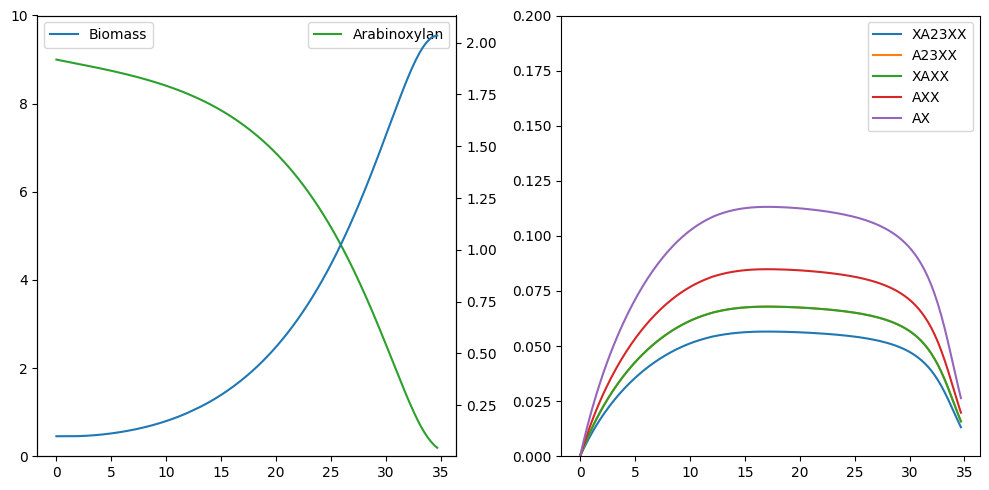

In [13]:
C_results = dict(zip(rxns,sol.y))

fig, ax = plt.subplots(1,2,figsize=(10,5))

ax[0].plot(sol.t,C_results["EX_arabinoxylan_e"]*180/1000,label="Arabinoxylan",color="tab:green")

ax_bio = plt.twinx(ax[0])
ax_bio.plot(sol.t,C_results["Growth"],label="Biomass")
ax[0].legend()
ax[0].set_ylim([0,10])
ax_bio.legend()

ax[1].plot(sol.t,C_results["EX_XA23XX_e"],label="XA23XX")
ax[1].plot(sol.t,C_results["EX_A23XX_e"],label="A23XX")
ax[1].plot(sol.t,C_results["EX_XAXX_e"],label="XAXX")
ax[1].plot(sol.t,C_results["EX_AXX_e"],label="AXX")
ax[1].plot(sol.t,C_results["EX_AX_e"],label="AX")
ax[1].legend()
ax[1].set_ylim([0,0.2])


plt.tight_layout()
#plt.savefig("dfba_arabinoxylan.png")